# Lab 6 - Classification
## Hudson Arney

### Introduction: 
In this lab I hope to predict whether breast tissue samples are considered cancerous or not using logistic regression models. The dataset comes from Wisconsin Breast Cancer Wisconsin (Diagnostic) that contains data from patients and is labeled as either malignant (cancerous) or benign (not). Breast cancer diagnosis is an important area in medical research because many people are affected by it, either directly or indirectly, particularly in the US. Using machine learning techniques gives us the ability to predict whether tissues samples can be considered cancerous, and the hope of saving lives through early diagnosis. Exploring logistic regression, I aim to understand how and when to use this statistical technique. Through comparing a baseline and greedy approach to these models, I'll note the differences in accuracy. Finally, I will have an oppurtionity to plot an ROC curve to give visualization to the model performance by using different discrimination thresholds.

### Dataset Description:
This dataset contains 30 numerical features, engineered from 10 attributes by calculating mean, standard error, and worst/largest for each sample. The target will the diagnosis (malignant or benign) variable.


### 1. Load, transform, and clean the data.
Describe the original data and transformed data using head(), info(), and describe().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
file_path = "wdbc.data.csv"
df = pd.read_csv(file_path, header=None) # No column names so I add them here based on the dataset description
column_names = ['ID', 'Diagnosis'] + \
                [f'Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area', 'Mean_Smoothness',
                'Mean_Compactness', 'Mean_Concavity', 'Mean_ConcavePoints', 'Mean_Symmetry', 'Mean_FractalDimension'] + \
               [f'SE_Radius', 'SE_Texture', 'SE_Perimeter', 'SE_Area', 'SE_Smoothness',
                'SE_Compactness', 'SE_Concavity', 'SE_ConcavePoints', 'SE_Symmetry', 'SE_FractalDimension'] + \
               [f'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Area', 'Worst_Smoothness',
                'Worst_Compactness', 'Worst_Concavity', 'Worst_ConcavePoints', 'Worst_Symmetry', 'Worst_FractalDimension']

df.columns = column_names

In [3]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0}) # Binary Categories, changed to int for testing purposes

In [4]:
df = df.drop(df.columns[0], axis=1) # Removed the ID column because it grants no predictive ability

In [5]:
df.head()

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_ConcavePoints,Mean_Symmetry,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_ConcavePoints,Worst_Symmetry,Worst_FractalDimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnosis               569 non-null    int64  
 1   Mean_Radius             569 non-null    float64
 2   Mean_Texture            569 non-null    float64
 3   Mean_Perimeter          569 non-null    float64
 4   Mean_Area               569 non-null    float64
 5   Mean_Smoothness         569 non-null    float64
 6   Mean_Compactness        569 non-null    float64
 7   Mean_Concavity          569 non-null    float64
 8   Mean_ConcavePoints      569 non-null    float64
 9   Mean_Symmetry           569 non-null    float64
 10  Mean_FractalDimension   569 non-null    float64
 11  SE_Radius               569 non-null    float64
 12  SE_Texture              569 non-null    float64
 13  SE_Perimeter            569 non-null    float64
 14  SE_Area                 569 non-null    fl

Although Diagnosis is a Category that is binary, I want to have the dtype be int so the model can make predictions on it so I give the values 1 and 0 of either having breast cancer or not.

In [7]:
print(df['Diagnosis'].value_counts())

0    357
1    212
Name: Diagnosis, dtype: int64


I wanted to see if there was an adequte number of diagnosis points for each category, there is

### 2. Use an appropriate experimental design. Perform a train/test split using a 70/30 ratio.

In [8]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Standardize the features

In [9]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns=X_test.columns)

 ### 3. Create two logistic regression models:

**a. A baseline model that uses all standardized features**

In [10]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    standard_dev = ((accuracy * (1 - accuracy)) / len(y_true))**0.5
    return accuracy, standard_dev

In [11]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train_standardized, y_train)
y_pred_baseline = baseline_model.predict(X_test_standardized)

baseline_accuracy, baseline_sd = calculate_accuracy(y_test, y_pred_baseline)
print(f'Baseline Accuracy: {baseline_accuracy}')
print(f'Baseline Std Dev: {baseline_sd}')

Baseline Accuracy: 0.9707602339181286
Baseline Std Dev: 0.012883826880845895


**b. A model built using a "greedy" approach.**

In [12]:
def forward_feature_selection(X, y):
    selected_features = []
    best_accuracy_mean = 0
    best_accuracy_std = 0

    num_splits = 5
    fold_size = len(X) // num_splits

    for feature in X.columns:
        if feature not in selected_features:
            current_features = selected_features + [feature]
            standard_deviations = []
            accuracies = []

            for fold in range(num_splits):
                start = fold * fold_size
                end = (fold + 1) * fold_size

                X_val = X.iloc[start:end]
                y_val = y.iloc[start:end]

                X_train = X.drop(X.index[start:end])
                y_train = y.drop(y.index[start:end])

                model = LogisticRegression()
                model.fit(X_train[current_features], y_train)
                y_pred = model.predict(X_val[current_features])

                accuracy, standard_dev = calculate_accuracy(y_val, y_pred)
                accuracies.append(accuracy)
                standard_deviations.append(standard_dev)

            mean_accuracy = np.mean(accuracies)
            std_accuracy = np.mean(standard_deviations)

            if mean_accuracy > best_accuracy_mean:
                best_accuracy_mean = mean_accuracy
                best_accuracy_std = std_accuracy
                selected_features = current_features

    return selected_features, best_accuracy_mean, best_accuracy_std

This method was created to make greedy models (used in part 3 and 4). We only add features if they provide a significant increase in accuracy to the model.

In [13]:
selected_features, greedy_accuracy, greedy_sd = forward_feature_selection(X_train_standardized_df, y_train)

In [14]:
print("Selected Variables: ", selected_features)
print("Selected Variable Count: ", len(selected_features))
print("Greedy Accuracy: ", greedy_accuracy)
print("Greedy Standard Deviation: ", greedy_sd)

Selected Variables:  ['Mean_Radius', 'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity', 'Worst_Radius', 'Worst_Texture', 'Worst_Smoothness', 'Worst_ConcavePoints']
Selected Variable Count:  8
Greedy Accuracy:  0.9822784810126584
Greedy Standard Deviation:  0.012866694434667134


### 4. Run a statistical comparison between the performance of the two models. Identify if there is evidence to support one model being superior to the other. Report the p-value and plot the accuracy and standard deviation of the two models. This should be done using the training/validation sets.

In [15]:
num_runs = 5

baseline_accuracies = []
greedy_accuracies = []

for run in range(num_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)
    X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=X_train.columns)
    X_test_standardized_df = pd.DataFrame(X_test_standardized, columns=X_test.columns)

    baseline_model_stat_test = LogisticRegression()
    baseline_model_stat_test.fit(X_train_standardized, y_train)
    y_pred_baseline = baseline_model_stat_test.predict(X_test_standardized)
    accuracy_baseline, accuracy_sd = calculate_accuracy(y_test, y_pred_baseline)
    baseline_accuracies.append(accuracy_baseline)

    selected_features, greedy_accuracy, greedy_sd = forward_feature_selection(X_train_standardized_df, y_train)
    greedy_model = LogisticRegression()
    greedy_model.fit(X_train_standardized_df[selected_features], y_train)
    y_pred_greedy = greedy_model.predict(X_test_standardized_df[selected_features])
    accuracy_greedy, greedy_sd = calculate_accuracy(y_test, y_pred_greedy)
    greedy_accuracies.append(accuracy_greedy)

print("Baseline Accuracies:", baseline_accuracies) # Wanted to get a multiple data points to compare
print("Greedy Model Accuracies:", greedy_accuracies)

Baseline Accuracies: [0.9590643274853801, 0.9766081871345029, 0.9590643274853801, 0.9824561403508771, 0.9590643274853801]
Greedy Model Accuracies: [0.9473684210526315, 0.9766081871345029, 0.9649122807017544, 0.9649122807017544, 0.9532163742690059]


In [16]:
t_stat_baseline, p_value = stats.ttest_ind(baseline_accuracies, greedy_accuracies)

print(f"P-value for Baseline Model: {p_value}")

P-value for Baseline Model: 0.4407657651224056


### Null Hypothesis: 
There is **no** significant difference in performance between the baseline and greedy models.

### Alternative Hypothesis: 
There is a significant difference in performance between the baseline and greedy models.


### p-value ≈ 0.44: If we use an alpha threshold value of 0.05, We do not reject the null hypothesis. 
___________________________________________________________________________________________________________________
The evidence suggests there is no statistically significant difference in performance between the baseline and greedy models.

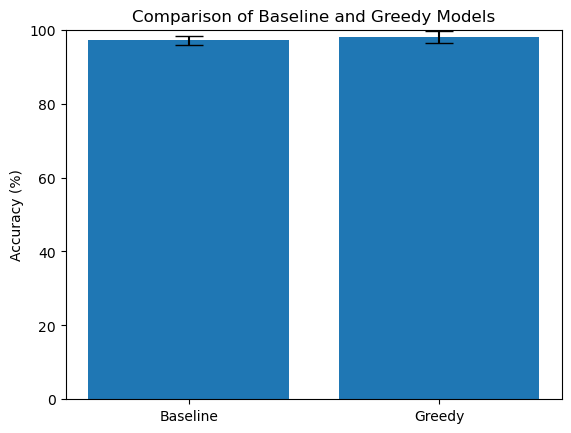

In [17]:
models = ['Baseline', 'Greedy']
accuracies = [baseline_accuracy * 100, greedy_accuracy * 100]
std_devs = [baseline_sd * 100, greedy_sd * 100]

plt.bar(models, accuracies, yerr=std_devs, capsize=10)
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Baseline and Greedy Models')
plt.ylim(0, 100)
plt.show()

### 5. Choose the best performant set of features and retrain a Logistic Regression model using the entire training data set. Using the held-out test data, characterize the final model and plot the ROC curve. The AUC should be reported in the figure legend.

In [18]:
final_model = LogisticRegression()
final_model.fit(X_train_standardized_df[selected_features], y_train)

LogisticRegression()

In [19]:
y_pred_final = final_model.predict(X_test_standardized_df[selected_features])
y_prob_final = final_model.predict_proba(X_test_standardized_df[selected_features])[:, 1]

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_final)
roc_auc = auc(fpr, tpr)

In [21]:
roc_accuracy, roc_sd = calculate_accuracy(y_test, y_pred_final)

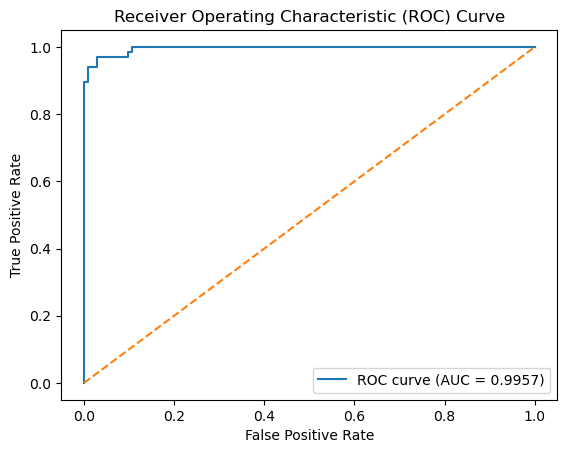

In [22]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
print(f"Final Model Characteristics:\n")
print(f"\tFinal Model AUC: {roc_auc}\n")
print(f"\tSelected Features: {selected_features}\n")
print(f"\tNumber of Features: {len(selected_features)}\n")
print(f"\tFinal Accuracy: {roc_accuracy}\n")
print(f"\tFinal AUC: {roc_auc}\n")

Final Model Characteristics:

	Final Model AUC: 0.9957167332952599

	Selected Features: ['Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Smoothness', 'SE_Texture', 'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Compactness', 'Worst_Concavity', 'Worst_ConcavePoints', 'Worst_Symmetry']

	Number of Features: 12

	Final Accuracy: 0.9532163742690059

	Final AUC: 0.9957167332952599



Here we got an AUC that is nearly 1, this means that the classifier is nearly perfect for finding breast cancer. The curve also doesn't have to many blocks due to there being quite a bit of data (with more data it could be even smoother).

### Conclusion
This lab aimed to identify and characterize an optimal set of features for training a logistic regression model to predict breast cancer diagnosis'. In total two models were constructed and compared: a baseline model utilizing all standardized features and a "greedy" model built iteratively with the selected features. The baseline and greedy models were then compared using statistical tests on training/validation sets. A final logistic regression model was trained on the entire training dataset and evaluated on the test set. From this final model, the ROC curve was plotted, and the corresponding AUC was reported as a performance metric. This lab taught me the importance of selecting the right features for predicting a dependent variable (in this case breast cancer) using logistic regression. Comparing models using ROC curves and AUC was something brand new to me and showed me the importance of predictive accuracy of using a model.